<a href="https://www.kaggle.com/code/vedumrajkar/digit-classification-with-pytorch?scriptVersionId=107510282" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## IMPORTING LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('../input/digit-recognizer/train.csv')
## THIS ONE IS THE TEST FILE
test_df=pd.read_csv('../input/digit-recognizer/test.csv')
fin_test=torch.Tensor(np.array(test_df))

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## HOW AN IMAGE HERE LOOKS LIKE

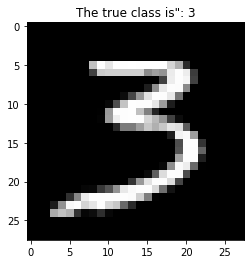

In [4]:
instance = 25
plt.imshow(np.reshape(np.array(df.iloc[instance,1:]), (28,-1)), cmap = 'gray')
plt.title('The true class is": %i' %df.iloc[instance, 0])
plt.show()

## SPLITTING INTO TRAIN AND TEST SETS

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('label',axis=1),df['label'])

## DEFINING THE MODEL(NETWORK)

In [6]:
input_size = 784
hidden_sizes = [64,32,64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.BatchNorm1d(hidden_sizes[1]),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], output_size),
                     nn.Softmax())

In [7]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model.parameters(),lr=0.09)
n_epochs=500
loader=torch.Tensor(np.array(X_train))
##target=torch.Tensor(np.array(pd.get_dummies(df['label']))).type(torch.LongTensor)
target=torch.tensor(np.array(y_train))
test=torch.Tensor(np.array(X_test))
test_target=torch.tensor(np.array(y_test))

NOTE THAT BATCH NORMALISATION MAKES IT POSSIBLE TO HAVE A STABLE LOSS CURVE AND A HIGHER LEARNING RATE

## TRAINING  THE MODEL

In [8]:
loss_list=[]
val_loss_list=[]
for i in range(n_epochs):
    optimizer.zero_grad()
    preds=model(loader)
    loss=criterion(preds,target.type(torch.long))
    val_loss=criterion(model(test),test_target.type(torch.long))
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())   
    val_loss_list.append(val_loss.item())
optimizer.zero_grad()

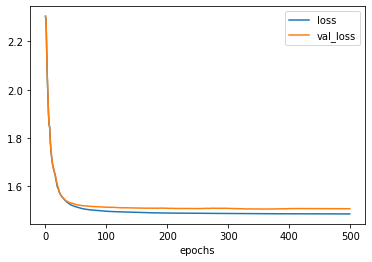

In [9]:
plt.plot(loss_list)
plt.plot(val_loss_list)
plt.legend(['loss','val_loss'])
plt.xlabel('epochs')
plt.show()


## TESTING THE ACCURACY ON THE VALIDATION DATA OF THE TRAIN SET

In [10]:
pred_test_labels=[]
temp=model(test).detach().numpy()
for i in range(len(test)):
   pred_test_labels.append(np.argmax(temp[i]))

<AxesSubplot:>

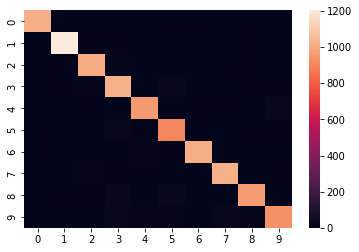

In [11]:
from sklearn.metrics import confusion_matrix
test_labels=np.array(y_test)
sns.heatmap(confusion_matrix(y_true=test_labels,y_pred=pred_test_labels))

### ACCURACY

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=test_labels,y_pred=pred_test_labels)

0.9541904761904761

## FINAL OUTPUT OF TEST SET

In [13]:
fin=model(fin_test).detach().numpy()
fin_results=[]
for i in range(len(fin)):
    fin_results.append(np.argmax(fin[i]))

In [14]:
image_id=[]
for i in range(len(fin_results)):
    image_id.append(i+1)
fin_df=pd.DataFrame({'ImageId':image_id,
                     'Label':fin_results})
fin_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [15]:
fin_df.to_csv('./\fin.csv', index = False, header=True)